# Принятие решений в бизнесе

Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


План проекта:
1. Приоритизация гипотез.
2. Анализ A/B-теста.
3. Общие выводы

Задачи к первой части проекта:
1. Применить фреймворк ICE для приоритизации гипотез. 
2. Применить фреймворк RICE для приоритизации гипотез.
3. Как изменилась приоритизация гипотез при применении RICE вместо ICE.

Задачи к 2 части проекта:
1. Построить графики кумулятивной выручки и среднего чека по группам. 
2. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
3. Построить график кумулятивного среднего количества заказов по группам.
4. Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. 
5. Построить точечный график количества заказов по пользователям.
6. Расчет 95-й и 99-й перцентили количества заказов на пользователя.
7. Построить точечный график стоимостей заказов.
8. Расчет 95-й и 99-й перцентили стоимости заказов. 
9. Посчитать статистическую значимость различий в среднем количестве заказов, чеке заказа между группами по «сырым» данным.
10. Посчитать статистическую значимость различий в среднем количестве заказов,  чеке заказа  между группами по «очищенным» данным.
11. Вывод


## Часть. Приоритизация гипотез.

### Откроем файл с данными и изучим основную информацию

In [1]:
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import datetime as dt

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [7]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


для удобства приведем названия столбцов к нижнем регистру

In [9]:
data.columns = data.columns.str.lower() #приведем названия столбцов к нижнему регистру

#### Фреймворк ICE для приоритизации гипотез

In [10]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Вывод: исходя из результатов, по ICE наиболее перспективными гипотензами можно считать гипотезы номер 8, 0 и 7.

 #### Фреймворк RICE для приоритизации гипотез. 

In [11]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))
pd.options.display.max_colwidth = 120

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Вывод: наиболее перспективные гипотезы это 7,2,0,6. На первом месте оказалась гипотеза 7, это объясняется тем, что ее параметр reach равен 10, в то время как для других гипотез он меньше. 

#### Как изменилась приоритизация гипотез при применении RICE вместо ICE

Вывод: Для ICE лидером таблицы является 8 гипотеза, однако в таблице RICE она опускается на 5 место. Лидером для таблицы RICE является 7 гипотеза, это связано с тем, что ее параметр reach равен 10, в то время как для других гипотез он меньше. В таблице ICE 7 гипотеза находится в тройке лидеров. Поэтому можно сделать вывод, что стоит отдать предпочтение 7 гипотезе 

## Часть. Анализ A/B-теста

### Откроем файлы с данными и изучим общую информацию

In [12]:
orders = pd.read_csv('/datasets/orders.csv')

In [13]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [14]:
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Проведем предобработку данных

Проверим количество пропусков в каждом столбце, а также на наличие явных дубликатов

In [18]:
orders.isna().sum() #к-во пропусков в каждом столбце

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [19]:
visitors.isna().sum() #к-во пропусков в каждом столбце

date        0
group       0
visitors    0
dtype: int64

In [20]:
orders.duplicated().sum() #поиск строк явных дубликатов

0

In [21]:
visitors.duplicated().sum() #поиск строк явных дубликатов

0

Можно заметить, что столбцы с датой в обеих таблицах принадлежат к типу object. Приведем их к типу datetime.

In [22]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [23]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [24]:
# переименование столбцов
orders = orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

Вывод: в ходе предобработки данных не было обнаружено явных дубликатов и пропусков в данных. Столбцы с датой были переведены в формат datetime. Также столбцы transactionId и visitorId были приведены к правильному формату. 

### Исследовательский анализ данных

Перед тем как начать анализ данных необходимо проверить наличие пользователей, которые попали в обе группы. Ведь они могут помешать анализу, т.к. мы не можем определить, что именно повлияло на их решение совершить заказ. 

In [25]:
usersAB = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index()
usersAB = usersAB.query('group>1')
display(usersAB)

,visitor_id,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


Принято решение их не удалять, но будем брать во внимание что такие покупатели существуют.

In [26]:
#подготовка данных к анализу
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

количество пользователей до выбранной даты включительно в группе A

In [27]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [28]:
#подготовка данных к анализу
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

количество пользователей до выбранной даты включительно в группе B

In [29]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [30]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

суммарное число заказов до выбранной даты включительно в группе A

In [31]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [32]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

суммарное количество заказов до выбранной даты включительно в группе B

In [33]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [34]:
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


### График кумулятивной выручки группам

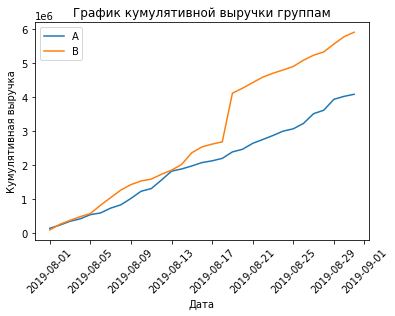

In [35]:
plt.plot(df['date'], df['revenueCummulativeA'], label='A')
# Строим график выручки группы B
plt.plot(df['date'], df['revenueCummulativeB'], label='B')
plt.xticks(rotation= 45)
plt.title('График кумулятивной выручки группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend() 
plt.show()

Вывод: судя по графику можно сделать вывод, что группа B является лидером. Вначале месяца обе группы шли достаточно ровно, но после 17 числа группа B стремительно растет. Можно заметить аномальный скачок в районе 18-19 чисел, скорее всего это заказ с аномально высокой стоимостью.

### График кумулятивного среднего чека по группам

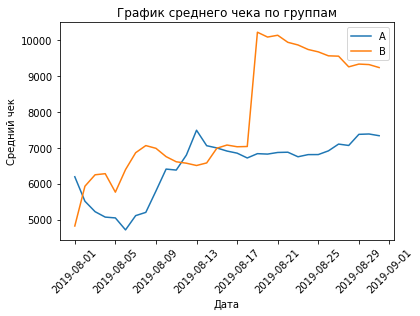

In [36]:
plt.plot(df['date'], df['revenueCummulativeA']/df['ordersCummulativeA'], label='A')
plt.plot(df['date'], df['revenueCummulativeB']/df['ordersCummulativeB'], label='B')
plt.xticks(rotation= 45)
plt.title('График среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 
plt.show()

Вывод: Судя по графику можно сделать вывод, что лидером является группа B. Также можно заметить стремительный рост после 17 числа. На это влияют аномальные значения. 

### График относительного изменения кумулятивного среднего чека группы B к группе A.

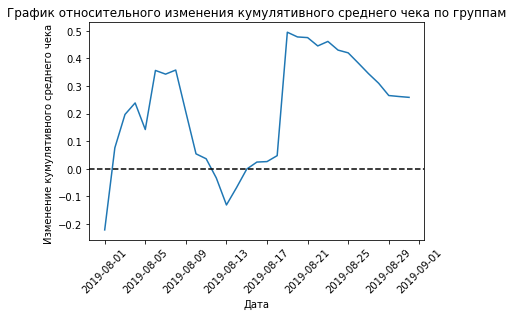

In [37]:

# cтроим отношение средних чеков
plt.plot(df['date'], (df['revenueCummulativeB']/df['ordersCummulativeB'])/(df['revenueCummulativeA']/df['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation= 45)
plt.title('График относительного изменения кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека ')
plt.show()

Вывод: Можно заметить значительный всплеск в районе 18-19 чисел, скорее всего на это влияют аномальные значения. 

### График кумулятивного среднего количества заказов по группам

In [38]:
df['visitorsCummulativeA']

0       719
1      1338
2      1845
3      2562
4      3318
5      3985
6      4629
7      5239
8      5856
9      6262
10     6980
11     7575
12     8323
13     9058
14     9686
15    10047
16    10459
17    11127
18    11629
19    12204
20    12850
21    13459
22    13927
23    14322
24    14943
25    15665
26    16376
27    16970
28    17547
29    18037
30    18736
Name: visitorsCummulativeA, dtype: int64

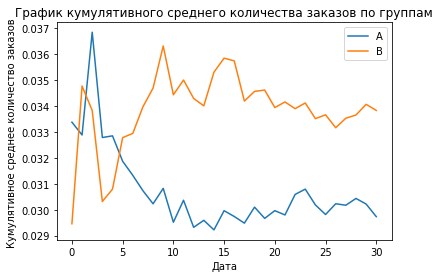

In [39]:
# Строим график выручки группы А
plt.plot(df['ordersCummulativeA']/ df['visitorsCummulativeA'], label='A')
# Строим график выручки группы B
plt.plot(df['ordersCummulativeB']/ df['visitorsCummulativeB'], label='B')
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов ')
plt.legend() 
plt.show()

Вывод: Судя по графику лидером по среднему количеству заказов является группа B. Можно также заметить, что для группы В после 15 числа количество заказов стабилизируется.

### График относительного изменения кумулятивного среднего количества заказов группы B к группе A

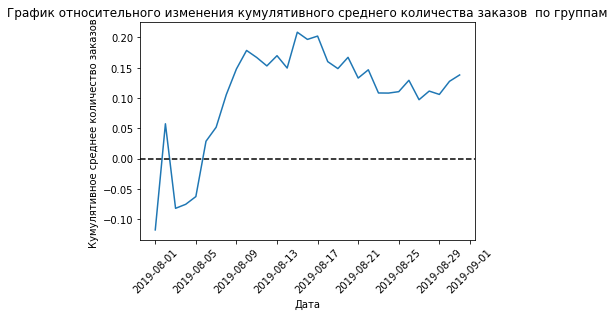

In [40]:

# cтроим отношение средних чеков
plt.plot(df['date'], (df['ordersCummulativeB']/df['visitorsCummulativeB'])/(df['ordersCummulativeA']/ df['visitorsCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation= 45)
plt.title('График относительного изменения кумулятивного среднего количества заказов  по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов ')
plt.show()

Вывод: В некоторых точках график скачет. В начале месяца среднее количество заказов для группы А было выше чем для группы В, однако в последствии после 5 числа, можно заметить значительный рост среднего количества заказов у группы В. 

Создадим переменную для заказов по пользователям

In [41]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']


### Точечный график количества заказов по пользователям

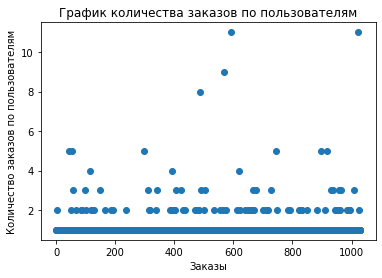

<Figure size 720x432 with 0 Axes>

In [42]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.xlabel('Заказы')
plt.ylabel('Количество заказов по пользователям')
plt.figure(figsize=(10,6))
plt.show()

Вывод: судя по графику можно сделать вывод, что больше всего пользователей которые совершили 1  заказ. А аномальными можно назвать выше 4 заказов. 

### Расчет 95-й и 99-й перцентили стоимости заказов

In [43]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Вывод: Можно сделать вывод, что не более 1% пользователей сделали больше 4 заказов, не более 5 процентов пользователей совершили больше 2 заказов.  Можно признать аномалиями количество заказов выше 2.

### Точечный график стоимостей заказов. 

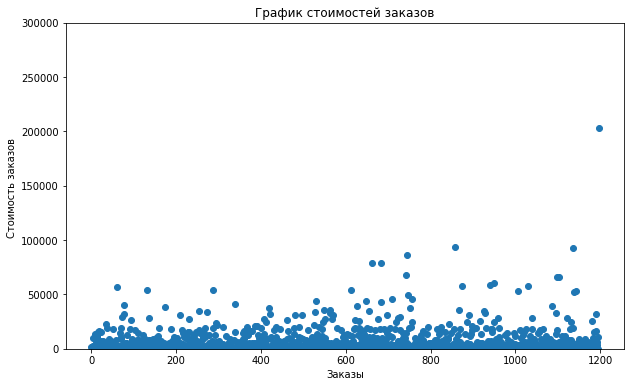

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.title('График стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов ')
plt.ylim(0,300000)
plt.scatter(x_values, orders['revenue'])
plt.show()

Вывод: судя по графику можно увидеть выбросы, где значения стоимости заказов больше 200 000.

### Расчет 95-й и 99-й перцентилей стоимости заказов

Создадим переменные ordersByUsersA и ordersByUsersB, где для пользователей совершивших хотя бы один заказ укажем количество заказов

In [45]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Вывод: не более 1% пользователей совершили заказ стоимостью выше 58 233,2. И не более 5 процентов пользователей совершили заказ выше 28 000. В качестве границы аномальныз заказов выберем значение 58233,2.

### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным. 

 Нулевая гипотеза: различий в среднем количестве заказов между группами нет.
 
 Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [46]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']


In [47]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

Переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

In [48]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



In [49]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Выведем значение p-value и относительный прирост среднего числа заказов 

In [50]:
print("p-value : {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов : {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value : 0.017
Относительный прирост среднего числа заказов : 0.138


Вывод: судя по «сырым» данным можно сделать вывод, что в среднем числе заказов групп A и B отличия есть, т.к. 0.017<0.05.
Относительный выигрыш группы B равен 13,8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке заказа между группами нет.

Альтернативная гипотеза: различия в среднем чеке заказа между группами есть.

In [51]:
print('p-value : {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего числа заказов : {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value : 0.729
Относительный прирост среднего числа заказов : 0.259


Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Также средний чек группы В превышает средний чек группы А.
Поскольку значение p-value значительно выше 0,05, а средний чек группы В превышает средний чек группы А на 26%, это может говорить о влиянии выбросов.

Определим количество аномальных значений. Ранее мы установили, что аномальными признаем количество заказов больше 2, а сумму заказа более 58000

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
31


Вывод: Количество аномальных пользователей - 31.

### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Подготовим выборки количества заказов по пользователям по группам теста

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [54]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

 Статистический критерий Манна-Уитни к полученным выборкам

In [55]:
print('p-value : {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов : {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value : 0.010
Относительный прирост среднего числа заказов : 0.174


Вывод: В сравнении с результатами по «сырым» данным значение p-value снизилось на 0,007 и оно по прежнему меньше 0,05.
Однако выигрыш группы B увеличился и вместо 13,8% стал составлять 17,4%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [56]:
print(
    'p-value : {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего числа заказов : {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value : 0.798
Относительный прирост среднего числа заказов : -0.020


Вывод: Значение p-value увеличилось на 0,069 и оно все также значительно превышает 0,05. Однако средний чек группы B теперь меньше среднего чека для группы А на 2%. Однако по «сырым» данным значение среднего чека для группы B превышало средний чек группы А на 26%, это связано с аномальными значениями, которые были удалены из данных. 

 ### Решение по результатам теста 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Вывод: исходя из проведенной работы, можно сделать вывод о победе группы B. Различия между группами есть, как по «сырым» так и по «очищенным» данным. Выигрыш группы В по «сырым» данным составляет 13,8% ,а по «очищенным» данным - 17,4%. 
Для среднего чека отличий нет, ведь что для «сырых» данных, что для «очищенных» значение p-value значительно превышает 0,05. И несмотря на то, что по «очищенным» данным средний чек группы В меньше среднего чека группы А на 2%, эта разница является незначительной. 

## Общие выводы

В первой части работы над проектом была проведена приоритизация гипотез. К гипотезам были применены фреймворки ICE и RICE. Для ICE лидером таблицы является 8 гипотеза, однако в таблице RICE она опускается на 5 место. Лидером для таблицы RICE является 7 гипотеза, это связано с тем, что ее параметр reach равен 10, в то время как для других гипотез он меньше. В таблице ICE 7 гипотеза находится в тройке лидеров. Поэтому можно сделать вывод, что стоит отдать предпочтение 7 гипотезе. 

Вторым этапом работы над проектом является анализ A/B-теста. Была проведена предобработка данных, где для столбца с датой был изменен формат с object на datetime, а также названия нескольких столбцов были переименованы. Были обнаружены пользователи, которые присутствуют и в группе А и В, но было принято решение их не удалять. После подготовки данных к исследованию были построены графики  кумулятивной  выручки, среднего чека, среднего количества заказов по группам. А также построены графики относительного изменения кумулятивного среднего чека, среднего количества заказов группы B к группе A.

Были расчитанны  95-й и 99-й, а также была проведена граница аномальных значений: 58 000 для стоимости заказа, для количество заказов - не более 2. Была расчитана статистическая значимость по «сырым» и  «очищенным» данным. 

Исходя из результатов теста было принято решение его остановить и зафиксировать победу за группой В. Различия между группами есть, как по «сырым» так и по «очищенным» данным. Выигрыш группы В по «сырым» данным составляет 13,8% ,а по «очищенным» данным - 17,4%. 
Для среднего чека отличий нет. И несмотря на то, что по «очищенным» данным средний чек группы В меньше среднего чека группы А на 2%, эта разница является незначительной.